# Curso de Capacitação para Cientista de Dados

# Projeto 3 - Python

### Etapa 1 - Definição do problema de negócio
Prever se os clientes do Banco Santander estão satisfeitos ou não com sua experiência bancária.
A acurácia do modelo deve ser de pelo menos 70%.

### Etapa 2 - Coleta dos dados
Foram coletados dados disponíveis no kaggle, no endereço: https://www.kaggle.com/c/santander-customer-satisfaction

In [1]:
import pandas as pd
data = pd.read_csv("Santander.csv"); data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


### Etapa 3 - Análise Exploratória

In [2]:
# Verificando o tamanho do dataset
data.shape

(76020, 371)

In [3]:
# Carregando o pacote gráfico
import matplotlib.pyplot as plt
%matplotlib inline

(array([73012.,  3008.]), array([0. , 0.5, 1. ]), <a list of 1 Patch objects>)

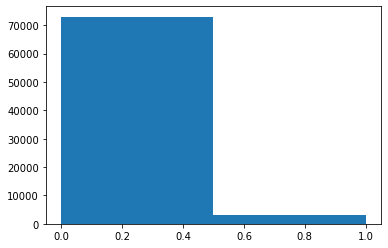

In [4]:
# Verificando a divisão dos dados
plt.hist(data["TARGET"], bins = 2, histtype = 'stepfilled', rwidth = 0.8)

A maior parte dos clientes do dataset estão satisfeitos, pois 73012 linhas possuem target igual a 0, enquanto apenas 3008 linhas possuem target igual a 1.
Target = 0 -> clientes satisfeitos;
Target = 1 -> clientes insatisfeitos.

In [5]:
# Verificando as informações estatísticas dos dados
data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [6]:
# Verificando se há valores missing
data.isnull().sum().sort_values(ascending = False)

TARGET                       0
num_op_var41_ult1            0
num_var26                    0
num_var25_0                  0
num_var25                    0
num_op_var40_hace2           0
num_op_var40_hace3           0
num_op_var40_ult1            0
num_op_var40_ult3            0
num_op_var41_hace2           0
num_op_var41_hace3           0
num_op_var41_ult3            0
num_var6_0                   0
num_op_var39_hace2           0
num_op_var39_hace3           0
num_op_var39_ult1            0
num_op_var39_ult3            0
num_var27_0                  0
num_var28_0                  0
num_var28                    0
num_var27                    0
num_var29_0                  0
num_var26_0                  0
num_var24                    0
num_var24_0                  0
num_var20                    0
num_var8_0                   0
num_var8                     0
num_var12_0                  0
num_var12                    0
                            ..
num_var7_emit_ult1           0
num_var7

In [7]:
# Verificando se há valores missing de outra forma
data.isnull().values.any()

False

Não há valores missing nos dados

In [8]:
# Verificando os tipos das colunas
data.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [9]:
# Como há muitas colunas no dataset, com a função info é possível verificar um resumo dos dados
# Há 371 colunas, sendo que 111 são do tipo float e 260 do tipo int, ou seja, todas as colunas possuem informação numérica
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


Como o dataset é muito extenso, não é possível analisar a correlação das variáveis.

### Etapa 4 - Preparação dos dados
Nesta etapa será feito o pré-processamento dos dados para que os mesmos estejam adequados para o algoritmo.

In [10]:
# Retirando a primeira (ID) e a última (Target) coluna do dataset para aplicar a normalização
data_int = data.iloc[:,1:370]; data_int.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [11]:
# Separando os dados de saída
data_out = data.iloc[:,370:]; data_out.head()

,TARGET
0,0
1,0
2,0
3,0
4,0


In [12]:
data_out.shape

(76020, 1)

In [13]:
# Aplicando normalização aos dados de entrada:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
data_norm = scaler.fit_transform(data_int)

In [14]:
# Verificando como ficaram os dados normalizados
data_norm

array([[0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00154526],
       [0.99976406, 0.29      , 0.        , ..., 0.        , 0.        ,
        0.0020025 ],
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.00282212],
       ...,
       [0.99976406, 0.18      , 0.        , ..., 0.        , 0.        ,
        0.003126  ],
       [0.99976406, 0.2       , 0.        , ..., 0.        , 0.        ,
        0.00359128],
       [0.99976406, 0.41      , 0.        , ..., 0.        , 0.        ,
        0.00509076]])

In [15]:
data_norm.shape

(76020, 369)

In [16]:
# Devido o dataset ser muito grande, será necessário fazer a redução de dimensionalidade utilizando o PCA 
# (Principal Component Analysis)
# Como os dados já estão normalizados e todas as variáveis são numéricas, é possível aplicar o PCA

# Carregando a função
from sklearn.decomposition import PCA

# Aplicando a função aos dados normalizados
pca = PCA(n_components = 10)
data_norm_PCA = pca.fit_transform(data_norm)

In [17]:
# Avaliando o resultado da aplicação
print(pca.fit(data_norm).explained_variance_ratio_)
print(pca.fit(data_norm).components_)

[0.27154664 0.19262329 0.10112909 0.08260766 0.06761694 0.06481698
 0.03714281 0.02848089 0.01658167 0.0143028 ]
[[ 1.73716195e-03  1.68017938e-02  4.44335017e-04 ...  9.31006583e-05
   1.09829483e-04 -3.03090629e-04]
 [-4.63170932e-04  3.44300011e-02  2.83013338e-04 ...  6.73298145e-05
   9.34273559e-05  1.90451384e-04]
 [ 6.45499373e-04  8.45067599e-02  5.17153279e-04 ...  6.43763836e-05
   9.48995705e-05  3.88831412e-04]
 ...
 [ 1.81503134e-03  3.31636078e-03  2.37651185e-04 ... -2.33443778e-05
  -3.26102077e-05  1.81546832e-04]
 [-4.33165109e-03  2.94411850e-03  1.16519245e-03 ...  4.33303810e-04
   5.28398543e-04 -3.16448246e-04]
 [ 2.70994677e-03  4.71495851e-02 -3.80559727e-04 ...  8.84031956e-05
   8.93119182e-05  7.04559734e-04]]


In [18]:
# Verificando a variância acumulada
pca.fit(data_norm).explained_variance_ratio_.cumsum()

array([0.27154664, 0.46416992, 0.56529901, 0.64790667, 0.71552361,
       0.78034059, 0.8174834 , 0.84596428, 0.86254595, 0.87684876])

In [19]:
# Com a redução de 369 para 10 variáveis, foi possível explicar 87% dos dados. Para conseguir um maior percentual,
# o nº de componentes será elevado de 10 para 20

# Aplicando a função aos dados normalizados
pca = PCA(n_components = 20)
data_norm_PCA = pca.fit_transform(data_norm)

In [20]:
# Avaliando o resultado da aplicação
print(pca.fit(data_norm).explained_variance_ratio_)
print(pca.fit(data_norm).components_)

[0.27154664 0.19262329 0.10112909 0.08260766 0.06761694 0.06481698
 0.03714281 0.02848089 0.01658167 0.0143028  0.01349128 0.01285434
 0.00927508 0.00682029 0.0062179  0.00601429 0.0055771  0.00499381
 0.00449094 0.00424287]
[[ 1.73716195e-03  1.68017938e-02  4.44335017e-04 ...  9.31006583e-05
   1.09829483e-04 -3.03090629e-04]
 [-4.63170932e-04  3.44300011e-02  2.83013338e-04 ...  6.73298145e-05
   9.34273559e-05  1.90451384e-04]
 [ 6.45499373e-04  8.45067599e-02  5.17153279e-04 ...  6.43763835e-05
   9.48995704e-05  3.88831412e-04]
 ...
 [-3.32412623e-03  2.40215816e-02  1.72843514e-04 ...  1.36863952e-02
   1.76075720e-02  4.55447434e-04]
 [ 2.55490360e-03 -3.65909372e-01  6.12621284e-04 ...  2.42000013e-03
   3.08246196e-03  2.61622987e-04]
 [ 3.64965846e-03 -5.99634218e-01 -3.46627860e-04 ...  5.76678294e-03
   7.50377384e-03  4.64671865e-04]]


In [21]:
# Verificando a variância acumulada
pca.fit(data_norm).explained_variance_ratio_.cumsum()

array([0.27154664, 0.46416992, 0.56529901, 0.64790667, 0.71552361,
       0.78034059, 0.8174834 , 0.84596428, 0.86254595, 0.87684876,
       0.89034003, 0.90319438, 0.91246946, 0.91928975, 0.92550765,
       0.93152195, 0.93709905, 0.94209285, 0.94658379, 0.95082666])

Aumentando o nº de componentes para 20, foi possível explicar 95% dos dados, sendo este percentual muito bom.

In [22]:
# Transformando os dados em dataframe novamente para que possa ser treinado
numeros = range(1,21)
colunas = ["PCA"+ str(num) for num in numeros]
data_pronto = pd.DataFrame(data = data_norm_PCA, columns = colunas)
data_pronto.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20
0,-1.274542,0.375972,0.056829,-0.439875,-0.039916,-0.114012,-0.054436,-0.033986,-0.000646,-0.010634,-0.046661,0.002073,0.018142,-0.008006,-0.005842,0.033248,-0.017969,-0.020323,0.042172,0.070154
1,-0.108038,-0.048862,1.799190,0.203618,-1.327840,0.274607,-0.164000,-0.164823,-0.081474,-0.063830,0.022308,-0.001669,-0.476433,-0.154816,-0.104632,0.279494,0.020731,-0.103847,0.080055,0.171911
2,0.027935,-0.439468,-0.335930,-0.187874,-0.066789,0.081755,0.507333,0.414996,-0.005015,-0.008462,0.081818,-0.007557,-0.034232,-0.071125,-0.025873,0.023791,-0.148119,0.118204,-0.003082,-0.037072
3,1.427146,1.492291,-0.688243,0.024221,-0.671363,-0.843693,0.315254,-0.564295,-0.147847,-0.076420,0.113738,-0.032581,-0.027508,-0.311972,-0.056644,-0.139605,-0.070833,0.057861,0.002250,-0.011742
4,0.426464,0.122872,1.311621,0.190963,1.681094,-0.904324,-0.185651,0.363184,0.333842,-0.352784,0.028643,0.148596,-0.220520,0.300450,0.077625,0.278768,-0.281667,0.066714,-0.128093,-0.082723


### Etapa 5 - Amostragem
Nesta etapa os dados serão divididos em dados de treino e teste para que possa ter uma melhor perfomance do modelo de Machine Learning

In [23]:
# Carregando a função de treino e teste
from sklearn.model_selection import train_test_split

# Definindo o tamanho da amostra de teste
test_size = 0.3

# Criando os conjuntos de dados de treino e teste sobre os dados modificados
X_treino, X_teste, Y_treino, Y_teste = train_test_split(data_pronto, data_out, test_size = test_size)

In [24]:
# Conferindo o tamanho dos dados de treino
X_treino.shape

(53214, 20)

In [25]:
# Conferindo o tamanho dos dados de teste
X_teste.shape

(22806, 20)

### Etapa 6 - Treinamento do Modelo
Após toda a etapa de análise exploratória e pré-processamento dos dados, o modelo finalmente será criado

In [26]:
# Primeiramente, será utilizado o algoritmo de regressão logística, visto que os dados estão normalizados
# e a classificação é binária

# Importando o modelo
from sklearn.linear_model import LogisticRegression

# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

C:\Users\camil\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

### Etapa 7 - Avaliando o modelo
Nesta etapa será verificada a acurácia do modelo

In [27]:
# Verificando a acurácia com a Confusion Matrix

# Importando a função
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fazendo as previsões
previsoes = modelo.predict(X_teste)

# Construindo a Confusion Matrix
CM = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(CM)

[[21939     1]
 [  865     1]]


In [28]:
# Calculando a acurácia
accuracy_score(Y_teste, previsoes)

0.962027536613172

In [29]:
# Relatório de classificação
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     21940
           1       0.50      0.00      0.00       866

    accuracy                           0.96     22806
   macro avg       0.73      0.50      0.49     22806
weighted avg       0.94      0.96      0.94     22806



Apesar da acurácia do modelo ter sido muito satisfatória (96%), pode-se prerceber com o relatório acima, que o modelo está enviesado, ou seja, aprendeu mais sobre uma classe do que da outra, visto que a classe 0 possuía muito mais dados (vide histograma apresentado no início do notebook).
Agora será necessário seguir para a próxima etapa, a fim de otimizar a acurácia do modelo.

### Etapa 8 - Otimização do modelo
Nesta etapa será feito o balanceamento dos dados, a fim de conseguir um melhor resultado do modelo.

In [30]:
# Primeiro será gerado um novo dataset com os dados do PCA. Para isso a variável target, presente no dataset "data_out"
# será concatenada com o dataset com o PCA aplicado "data_pronto"

# Concatenando os datasets
data2 = pd.concat([data_pronto, data_out], axis = 1)
data2.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,TARGET
0,-1.274542,0.375972,0.056829,-0.439875,-0.039916,-0.114012,-0.054436,-0.033986,-0.000646,-0.010634,...,0.002073,0.018142,-0.008006,-0.005842,0.033248,-0.017969,-0.020323,0.042172,0.070154,0
1,-0.108038,-0.048862,1.799190,0.203618,-1.327840,0.274607,-0.164000,-0.164823,-0.081474,-0.063830,...,-0.001669,-0.476433,-0.154816,-0.104632,0.279494,0.020731,-0.103847,0.080055,0.171911,0
2,0.027935,-0.439468,-0.335930,-0.187874,-0.066789,0.081755,0.507333,0.414996,-0.005015,-0.008462,...,-0.007557,-0.034232,-0.071125,-0.025873,0.023791,-0.148119,0.118204,-0.003082,-0.037072,0
3,1.427146,1.492291,-0.688243,0.024221,-0.671363,-0.843693,0.315254,-0.564295,-0.147847,-0.076420,...,-0.032581,-0.027508,-0.311972,-0.056644,-0.139605,-0.070833,0.057861,0.002250,-0.011742,0
4,0.426464,0.122872,1.311621,0.190963,1.681094,-0.904324,-0.185651,0.363184,0.333842,-0.352784,...,0.148596,-0.220520,0.300450,0.077625,0.278768,-0.281667,0.066714,-0.128093,-0.082723,0


In [31]:
# Verificando o tamamnho do novo dataset
data2.shape

(76020, 21)

Para o balanceamento das classes será utilizado o método Smote, que consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos. 

Porém, como a diferença entre as classes está muito grande (73012 x 3008),primeiramente os dados da classe 0 serão reduzidos de forma aleatória para 20000 e depois as mesmas serão igualadas.
Logo, teremos um novo dataset com, em torno de, 40000 observações.

In [32]:
# Separando o dataset da classe 0
data_classe0 = data2[data2["TARGET"] == 0]
data_classe0.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,TARGET
0,-1.274542,0.375972,0.056829,-0.439875,-0.039916,-0.114012,-0.054436,-0.033986,-0.000646,-0.010634,...,0.002073,0.018142,-0.008006,-0.005842,0.033248,-0.017969,-0.020323,0.042172,0.070154,0
1,-0.108038,-0.048862,1.799190,0.203618,-1.327840,0.274607,-0.164000,-0.164823,-0.081474,-0.063830,...,-0.001669,-0.476433,-0.154816,-0.104632,0.279494,0.020731,-0.103847,0.080055,0.171911,0
2,0.027935,-0.439468,-0.335930,-0.187874,-0.066789,0.081755,0.507333,0.414996,-0.005015,-0.008462,...,-0.007557,-0.034232,-0.071125,-0.025873,0.023791,-0.148119,0.118204,-0.003082,-0.037072,0
3,1.427146,1.492291,-0.688243,0.024221,-0.671363,-0.843693,0.315254,-0.564295,-0.147847,-0.076420,...,-0.032581,-0.027508,-0.311972,-0.056644,-0.139605,-0.070833,0.057861,0.002250,-0.011742,0
4,0.426464,0.122872,1.311621,0.190963,1.681094,-0.904324,-0.185651,0.363184,0.333842,-0.352784,...,0.148596,-0.220520,0.300450,0.077625,0.278768,-0.281667,0.066714,-0.128093,-0.082723,0


In [33]:
# Separando o dataset da classe 1
data_classe1 = data2[data2["TARGET"] == 1]
data_classe1.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA12,PCA13,PCA14,PCA15,PCA16,PCA17,PCA18,PCA19,PCA20,TARGET
31,-1.267317,0.390777,0.093167,-0.430282,-0.041534,-0.128998,-0.063192,-0.032560,0.000620,0.009642,...,0.057488,-0.011580,0.012405,0.042698,-0.134967,0.138209,-0.009994,-0.115179,-0.187693,1
80,1.688770,1.712700,-0.498231,-0.057749,-0.389719,-1.115037,-0.473546,0.295346,0.336682,-0.334773,...,0.028735,0.003237,-0.196109,-0.055849,-0.039107,0.106414,-0.139590,-0.080161,0.024956,1
122,0.777089,-0.465007,1.450356,0.377925,-1.188342,0.072688,-0.481419,0.783362,-0.345417,0.125250,...,0.231449,-0.476991,-0.104173,-0.043055,0.219018,-0.216965,0.236151,0.078718,-0.057319,1
162,-1.549024,0.354799,-0.325074,1.050530,-0.081979,-0.151594,-0.039737,0.037163,0.016902,-0.032761,...,0.025300,-0.027439,0.034971,0.030247,-0.041550,-0.015170,-0.019821,0.023047,0.032352,1
163,-1.267704,0.389637,0.090146,-0.431115,-0.041318,-0.127784,-0.062631,-0.032452,0.000906,0.007761,...,0.052481,-0.008802,0.011174,0.038244,-0.119595,0.124521,-0.010602,-0.100033,-0.163663,1


In [34]:
# Tamanho dos datasets
print("O dataset da classe 0 possui: %d linhas" % data_classe0.shape[0])
print("O dataset da classe 1 possui: %d linhas" % data_classe1.shape[0])

O dataset da classe 0 possui: 73012 linhas
O dataset da classe 1 possui: 3008 linhas


In [35]:
# Reduzindo o dataset da classe 0
data_classe0_nova = data_classe0.sample(20000)
data_classe0_nova.shape

(20000, 21)

In [36]:
# Juntando novamente os datasets
data3 = pd.concat([data_classe0_nova, data_classe1])
data3.shape

(23008, 21)

In [37]:
# Separando as features da variável target para aplicação do Smote
features = data3.drop("TARGET", axis = 1)
target = data3.TARGET

In [38]:
# instalando o pacote para usar o smote
!pip install -U imbalanced-learn --user

Requirement already up-to-date: imbalanced-learn in c:\users\camil\appdata\roaming\python\python37\site-packages (0.8.0)


In [39]:
# Carregando a função Smote
from imblearn.over_sampling import SMOTE

In [43]:
# Aplicando o método de Smote
smt = SMOTE()
features, target = smt.fit_resample(features, target)

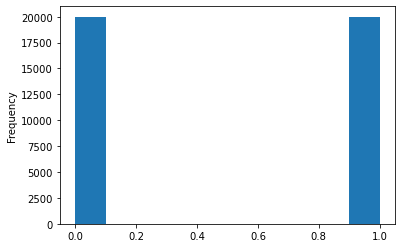

In [50]:
# Visualizando a distribuição das amostras
target.plot.hist()

In [55]:
# Agora as duas classes possuem a mesma quantidade
target.value_counts()

1    20000
0    20000
Name: TARGET, dtype: int64

In [56]:
# Com os dados equilibrados, o modelo pode ser novamente treinado

# Criando os conjuntos de dados de treino e teste sobre os dados equilibrados
X_treino, X_teste, Y_treino, Y_teste = train_test_split(features, target, test_size = test_size)

In [57]:
# Criando novamente o modelo de regressão logística
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

LogisticRegression()

In [58]:
# Fazendo as previsões
previsoes = modelo.predict(X_teste)

# Construindo a Confusion Matrix
CM = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(CM)

[[3964 1930]
 [1619 4487]]


In [59]:
# Calculando a acurácia
accuracy_score(Y_teste, previsoes)

0.70425

In [60]:
# Relatório de classificação
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69      5894
           1       0.70      0.73      0.72      6106

    accuracy                           0.70     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.70      0.70      0.70     12000



Após balanceamento dos dados, conseguiu-se uma acurácia de 70%. Porém, cabe testes com outros modelos para verificar a possibilidade de se conseguir uma melhor acurácia.

In [61]:
# Criando um modelo com o Decicion Tree

# Importando a função
from sklearn.tree import DecisionTreeClassifier

In [62]:
# Criando o modelo
modelo = DecisionTreeClassifier()
modelo.fit(X_treino, Y_treino)

DecisionTreeClassifier()

In [63]:
# Fazendo as previsões
previsoes = modelo.predict(X_teste)

# Construindo a Confusion Matrix
CM = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(CM)

[[4735 1159]
 [1071 5035]]


In [64]:
# Calculando a acurácia
accuracy_score(Y_teste, previsoes)

0.8141666666666667

In [65]:
# Relatório de classificação
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      5894
           1       0.81      0.82      0.82      6106

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000



Com o Decision Tree foi possível alcançar 81% de acurácia.

In [66]:
# Criando um modelo com o SVM

# Importando a função
from sklearn.svm import SVC

In [67]:
# Criando o modelo
modelo = SVC()
modelo.fit(X_treino, Y_treino)

SVC()

In [68]:
# Fazendo as previsões
previsoes = modelo.predict(X_teste)

# Construindo a Confusion Matrix
CM = confusion_matrix(Y_teste, previsoes)

# Imprimindo a Confusion Matrix
print(CM)

[[4073 1821]
 [1540 4566]]


In [69]:
# Calculando a acurácia
accuracy_score(Y_teste, previsoes)

0.7199166666666666

In [70]:
# Relatório de classificação
print(classification_report(Y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      5894
           1       0.71      0.75      0.73      6106

    accuracy                           0.72     12000
   macro avg       0.72      0.72      0.72     12000
weighted avg       0.72      0.72      0.72     12000



Com o modelo SVM foi possível atingir 72% de acurácia.

### Conclusão

O dataset utilizado neste projeto era muito extenso, possuía 76020 linhas e 371 colunas. Isto impossibilitou que fosse feita uma análise de correlação das variáveis, pois se tornaria inviável.

Portanto, para trabalhar com tantas features, seria necessário aplicar um método de redimensionalidade dos dados. Porém, para aplicar a redimensionalidade seria necessário normalizar os dados, pois, todas as variáveis eram do tipo numérica e estavam completamente fora de escala.

Sendo assim, foi aplicado aos dados a normalização e, em seguida, a redimensionalidade, através do método PCA (Principal Component Analysis).

Após aplicar o PCA e treinar o modelo com o algoritmo Logistic Regression, conseguiu-se uma alta acurácia (96%), porém, o modelo estava enviesado, ou seja, ele aprendeu mais de uma classe do que de outra, visto que as classes estavam muito desequilibradas.

Para resolver este problema, foi aplicado ao dataset um método de balanceamento de classes. Visto que os dados da classe 0 eram muito elevados em relação à classe 1, foi utilizado o método Smote, que consiste em gerar dados sintéticos (não duplicados) da classe minoritária a partir de vizinhos. 

Além disso, para que não fossem gerados tantos dados da classe 1, os dados da classe 0 foram reduzidos de 73012 linhas para 20000 linhas. Sendo assim, o novo dataset gerado ficou com 40000 linhas balanceadas, ou seja, 20000 linhas da classe 0 e 20000 da classe 1.

Após este trabalho de balanceamento, os dados foram novamente treinados. Três algoritimos foram utilizados: Logistic Regression, Decision Tree e SVM.

A acurácia alcançada nestes 3 algoritmos foram de 70%, 81% e 72%, respectivamente, todas atendendo à meta deste projeto.

Logo, dos 3 algoritmos testados, o que apresentou melhor acurácia foi o Decision Tree, alcançando uma marca de 81%, ficando 11% acima do objetivo deste projeto.